# Problem: generate the first n-th element of the Fibonacci sequence

https://en.wikipedia.org/wiki/Fibonacci_number

You can try yourself. It is a simple but not so easy problem to solve. Here below some of the solutions suggested by various groups of students. 

Let's take n = 500

In [1]:
import sys

In [2]:
# Solution 1: n = 500
n = 500
from time import time
t0 = time()
serie = []
serie.append(0)
serie.append(1)
for i in range(0, n-2):
    serie.append(serie[-1]+serie[-2])
print('{x:3}: {f:3}'.format(x = i+3, f = serie[-1]+serie[-2]))
ts = (time() - t0)
print("{0:.5f} ms".format(ts*1000.))

500: 139423224561697880139724382870407283950070256587697307264108962948325571622863290691557658876222521294125
1.23405 ms


In [3]:
print("Used Memory: %.3f kbytes" % (sys.getsizeof(serie)/1000))

Used Memory: 4.272 kbytes


### Comment
It is a good solution, it stricty apply the definition to solve the problem. Using range can be a little problem with very large N (why generate N numbers and make a loop over it?)

In [4]:
# Solution 2:
l = [0,1]
count = 0
while count <= n:
    f = l[-2] + l[-1]
    l.append(f)
    count+=1
print(l[n])

139423224561697880139724382870407283950070256587697307264108962948325571622863290691557658876222521294125


### Comment
Another good solution, this time using a "while" which solves the problem to make a list of n numbers using range.
The problem is now: do we need to save all the other n-2 elements of the sequence in the list "l"

In [5]:
print("Used Memory: %.3f kbytes" % (sys.getsizeof(l)/1000))

Used Memory: 4.392 kbytes


In [6]:
# Solution 3:
a, b = 0, 1
count = 2
while count <= n:
    c = a + b
    a, b = b, c
    count += 1
print(c)

139423224561697880139724382870407283950070256587697307264108962948325571622863290691557658876222521294125


### Comment
Excellent solution, no memory used!

A little improvement, by the way

In [7]:
# Solution 3b:
a, b = 0, 1
count = 2
while count <= n:
    a, b = b, a + b
    count += 1
print(b)

139423224561697880139724382870407283950070256587697307264108962948325571622863290691557658876222521294125


### Comment
It would be nice to make a loop without setting a counter. Something giving back a number of the sequence, everytime is asked. By the way, with the property of holding the previous values... is it too much to ask? 

In [8]:
# Solution 4
# http://stackoverflow.com/questions/494594/how-to-write-the-fibonacci-sequence-in-python
def fib_eff():
    a, b = 0, 1
    while True:            # First iteration:
        yield a            # yield 0 to start with and then
        a, b = b, a + b

def fib(n):
    for i, f in enumerate(fib_eff()):
        if i == n:
            return f
        
fib(n)

139423224561697880139724382870407283950070256587697307264108962948325571622863290691557658876222521294125

### Comment
It is also possible to use another method, calling the function itself as many times as need. 

Unfortunately this is pretty inefficient! Do not try with n > 35!

In [9]:
# Solution 5
def fib_rec(n):
    '''inefficient recursive function as defined, returns Fibonacci number'''
    if n > 1:
        return fib_rec(n-1) + fib_rec(n-2)
    return n
print(fib_rec(10))

55


In [10]:
t0 = time()
print(fib_rec(35))
ts = (time() - t0)
print("{0:.5f} ms".format(ts*1000.))
# n = 500 takes too much time!!!

9227465
7399.85967 ms


In [11]:
# Solution 5b: use an internal cache!
def fib_mem(n, _cache={}):
    '''efficiently memorized recursive function, returns a Fibonacci number'''
    if n in _cache:
        #print(_cache)
        return _cache[n]
    elif n > 1:
        # https://docs.python.org/3.6/library/stdtypes.html?highlight=setdefault#dict.setdefault
        return _cache.setdefault(n, fib_mem(n-1) + fib_mem(n-2))
    return n

t0 = time()
print(fib_mem(15))
ts = (time() - t0)
print("{0:.5f} ms".format(ts*1000.))

610
0.99254 ms


In [14]:
# Now in Python 3
# https://stackoverflow.com/questions/18172257/efficient-calculation-of-fibonacci-series
import functools

@functools.lru_cache(None)
def fib(n):
    if n < 2:
        return n
    return fib(n-1) + fib(n-2)

fib(n)

RecursionError: maximum recursion depth exceeded in comparison

# Problem:

Show that using the [Box-Muller transform](https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) is possible to general a random sequence of gaussian distributed number taking two random sequences of uniformly distributed numbers

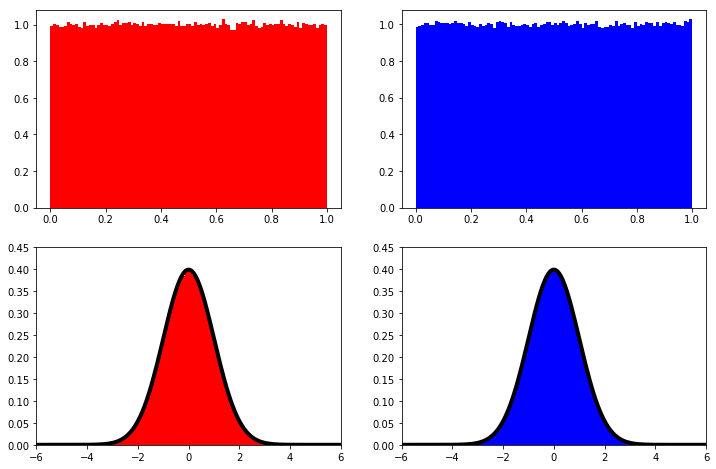

In [13]:
import numpy as np 
import matplotlib.pylab as plt
from scipy.stats import norm
%matplotlib inline

n, bins = 1000000, 100

# transformation function
def gaussian(u1,u2):
    zz = np.sqrt(-2*np.log(u1))
    z1 = zz * np.cos(2*np.pi*u2)
    z2 = zz * np.sin(2*np.pi*u2)
    return z1,z2

def gaussian_th(x, mu=0, sig=1):
    norm = ((2 * np.pi)**0.5 * sig)
    g = np.exp(-((x - mu) * (x - mu)) / (2 * sig * sig))
    return g/norm

# uniformly distributed values between 0 and 1
u1 = np.random.rand(n)
u2 = np.random.rand(n)

# run the transformation
z1,z2 = gaussian(u1,u2)

# plotting the values before and after the transformation
fig, axs = plt.subplots(2,2, figsize=(12,8))
res = [u1, u2, z1, z2]
colors = "rb"
for i in range(4):
    row, col = i//2, i%2
    axs[row, col].hist(res[i], bins=bins, color=colors[col], density=True)
    #np.histogram(v, bins=bins)

x = np.linspace(-6,6,150) 
for i in range(2):
    axs[1,i].plot(x, norm.pdf(x,0,1), lw=4, c='k')
    axs[1,i].axis((-6,6,0,0.45))
plt.show()